In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# -------- Load image ----------
img = cv2.imread("lena.jpg", cv2.IMREAD_GRAYSCALE).astype(np.float32)

In [3]:
# -------- Compute 2D-DCT ----------
img_dct = cv2.dct(img)

In [4]:
# -------- Apply ideal low-pass filter (fc = 64) ----------
fc = 64
h, w = img_dct.shape
# Create LP filtered DCT matrix
dct_lp = np.zeros_like(img_dct)
dct_lp[:fc, :fc] = img_dct[:fc, :fc]    # keep only low frequencies

In [5]:
# -------- Inverse DCT ----------
img_lp = cv2.idct(dct_lp)

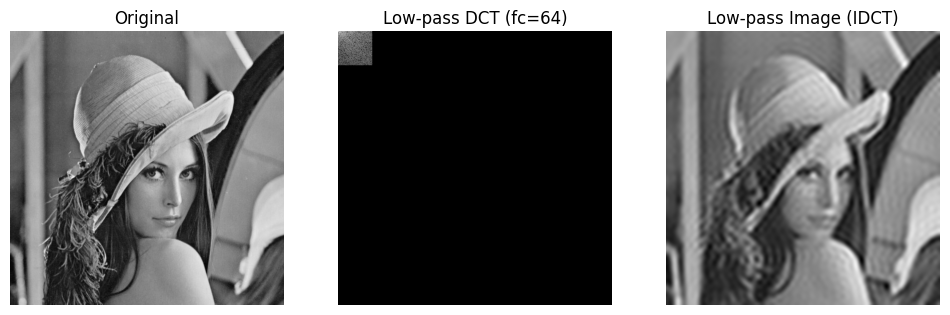

In [6]:
# -------- Display ----------
plt.figure(figsize=(12,4))

plt.subplot(1,3,1)
plt.title("Original")
plt.imshow(img, cmap='gray')
plt.axis("off")

plt.subplot(1,3,2)
plt.title("Low-pass DCT (fc=64)")
plt.imshow(np.log(np.abs(dct_lp)+1), cmap='gray')
plt.axis("off")

plt.subplot(1,3,3)
plt.title("Low-pass Image (IDCT)")
plt.imshow(img_lp, cmap='gray')
plt.axis("off")

plt.show()